In [25]:
import re
import nltk
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
font="Mangal Regular.ttf"
font="Preeti.ttf"
font="Aparajita.ttf"
font="gargi.ttf"
font="Nirmala UI"



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
dataset.head()

,headings,paras,label
0,‘लभ स्टेसन’ भियतनाम र इन्डोनेसियामा,नेपाली कथानक फिल्म ‘लभ स्टेसन’ को टिम यति बेला...,entertainment
1,चाडबाडलगत्तै तरकारी सस्तियो,दसैंको मुखमा अस्वाभाविक बढेको तरकारी तथा फलफूल...,business
2,किङ्गफिसर बियर नेपाली बजारमा,एशियाकै ठूलो बियर कम्पनी मध्येको युनाइटेड ब्रु...,business
3,अर्बपतिका आँखा अन्तरिक्षतिर,संसारका धनाढ्यहरू अन्तरिक्ष यात्रालाई सस्तो र ...,business
4,‘आई एम सरी’ भन्दै सौगात,निकेश खड्का निर्देशित फिल्म ‘फाटेको जुत्ता’ को...,entertainment


In [16]:
dataset['label'].value_counts()

business         2118
sports           2040
entertainment    1817
Name: label, dtype: int64

In [17]:
target_category = dataset['label'].unique()
print(target_category)

['entertainment' 'business' 'sports']


In [18]:
dataset['CategoryId'] = dataset['label'].factorize()[0]
dataset.head()

,headings,paras,label,CategoryId
0,‘लभ स्टेसन’ भियतनाम र इन्डोनेसियामा,नेपाली कथानक फिल्म ‘लभ स्टेसन’ को टिम यति बेला...,entertainment,0
1,चाडबाडलगत्तै तरकारी सस्तियो,दसैंको मुखमा अस्वाभाविक बढेको तरकारी तथा फलफूल...,business,1
2,किङ्गफिसर बियर नेपाली बजारमा,एशियाकै ठूलो बियर कम्पनी मध्येको युनाइटेड ब्रु...,business,1
3,अर्बपतिका आँखा अन्तरिक्षतिर,संसारका धनाढ्यहरू अन्तरिक्ष यात्रालाई सस्तो र ...,business,1
4,‘आई एम सरी’ भन्दै सौगात,निकेश खड्का निर्देशित फिल्म ‘फाटेको जुत्ता’ को...,entertainment,0


In [19]:
category = dataset[['label', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
print(category)

           label  CategoryId
0  entertainment           0
1       business           1
5         sports           2


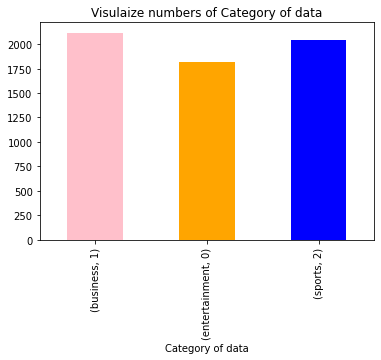

In [22]:
dataset.groupby('label').CategoryId.value_counts().plot(kind = "bar", color = ["pink", "orange", "blue"])
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()

entertainment related words:


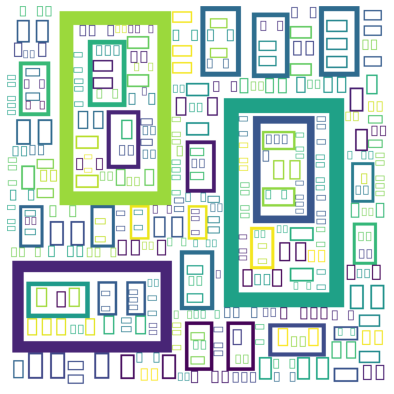

business related words:


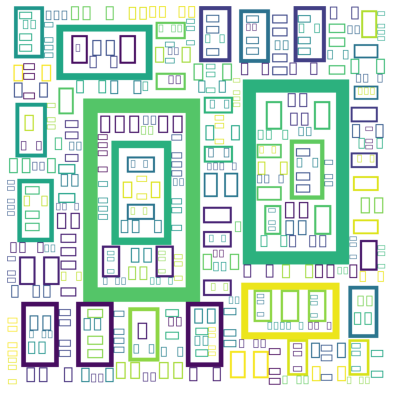

sports related words:


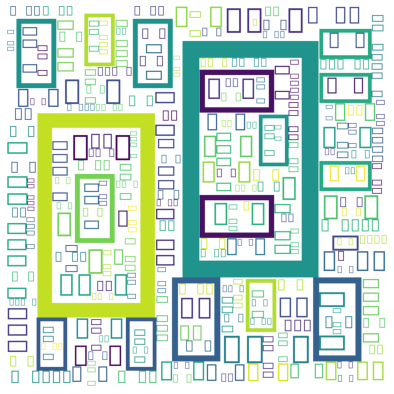

In [29]:
from wordcloud import WordCloud
stop = set(stopwords.words('nepali'))
entertainment = dataset[dataset['CategoryId'] == 0]
entertainment = entertainment['paras']
business = dataset[dataset['CategoryId'] == 1]
business = business['paras']
sports = dataset[dataset['CategoryId'] == 2]
sports = sports['paras']

def wordcloud_draw(dataset, color = 'white'):
    words = ' '.join(dataset)
    cleaned_word = ' '.join([word for word in words.split()
    if (word != 'news' and word != 'text')])
    wordcloud = WordCloud(stopwords = stop, background_color = color, width = 2500, height = 2500).generate(cleaned_word)
    plt.figure(1, figsize = (10,7))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

print("entertainment related words:")
wordcloud_draw(entertainment, 'white')
print("business related words:")
wordcloud_draw(business, 'white')
print("sports related words:")
wordcloud_draw(sports, 'white')


In [30]:
text = dataset["paras"]
text.head(10)

0    नेपाली कथानक फिल्म ‘लभ स्टेसन’ को टिम यति बेला...
1    दसैंको मुखमा अस्वाभाविक बढेको तरकारी तथा फलफूल...
2    एशियाकै ठूलो बियर कम्पनी मध्येको युनाइटेड ब्रु...
3    संसारका धनाढ्यहरू अन्तरिक्ष यात्रालाई सस्तो र ...
4    निकेश खड्का निर्देशित फिल्म ‘फाटेको जुत्ता’ को...
5    अधिकांस दोस्रो रोजाइका खेलाडी उतारेको त्रिभुवन...
6    मोहम्मद सलाहले पहिलो हाफमा गरेको गोल र खेलको अ...
7    चार वर्षयता नाजिर हुसेनले चारै वटा फिल्म खेले ...
8    अमेरिकामा रहेका प्रधानमन्त्री केपी शर्मा ओलीले...
9    भूकम्प गएको तीन वर्षको अवधिमा पाँचौंपटक पुनर्न...
Name: paras, dtype: object

In [31]:
text = dataset["label"]
text.head(10)

0    entertainment
1         business
2         business
3         business
4    entertainment
5           sports
6           sports
7    entertainment
8         business
9         business
Name: label, dtype: object

In [32]:
def remove_tags(text):
    remove = re.compile(r'')
    return re.sub(remove, '', text)
    dataset['paras'] = dataset['paras'].apply(remove_tags)

In [33]:
def special_char(text):
    reviews = ''
    for x in text:
        if x.isalnum():
            reviews = reviews + x
        else:
            reviews = reviews + ' '
    return reviews
    dataset['paras'] = dataset['paras'].apply(special_char)

In [34]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [x for x in words if x not in stop_words]
    dataset['paras'] = dataset['paras'].apply(remove_stopwords)
dataset['paras'][1]

'दसैंको मुखमा अस्वाभाविक बढेको तरकारी तथा फलफूलको भाउ घट्न थालेको छ\u202f। उत्पादन वृद्धिसँगै सहज आपूर्तिका कारण मूल्य घटेको हो\u202f।'

In [35]:
def lemmatize_word(text):
    wordnet = WordNetLemmatizer()
    return " ".join([wordnet.lemmatize(word) for word in text])
    dataset['paras'] = dataset['paras'].apply(lemmatize_word)
dataset['paras'][1]

'दसैंको मुखमा अस्वाभाविक बढेको तरकारी तथा फलफूलको भाउ घट्न थालेको छ\u202f। उत्पादन वृद्धिसँगै सहज आपूर्तिका कारण मूल्य घटेको हो\u202f।'

In [36]:
dataset

,headings,paras,label,CategoryId
0,‘लभ स्टेसन’ भियतनाम र इन्डोनेसियामा,नेपाली कथानक फिल्म ‘लभ स्टेसन’ को टिम यति बेला...,entertainment,0
1,चाडबाडलगत्तै तरकारी सस्तियो,दसैंको मुखमा अस्वाभाविक बढेको तरकारी तथा फलफूल...,business,1
2,किङ्गफिसर बियर नेपाली बजारमा,एशियाकै ठूलो बियर कम्पनी मध्येको युनाइटेड ब्रु...,business,1
3,अर्बपतिका आँखा अन्तरिक्षतिर,संसारका धनाढ्यहरू अन्तरिक्ष यात्रालाई सस्तो र ...,business,1
4,‘आई एम सरी’ भन्दै सौगात,निकेश खड्का निर्देशित फिल्म ‘फाटेको जुत्ता’ को...,entertainment,0
...,...,...,...,...
5970,चार जिल्लाका ७ सय स्थानमा नि:शुल्क ईन्टरनेट सेवा,नेपाल टेलिकमले भूकम्प प्रभावित चार जिल्लाका ७ ...,business,1
5971,लन्डनमा ‘लिलिबिली’ धमाधम,मिलन चाम्सको निर्देशन रहेको ‘लिलिबिली’ को यति ...,entertainment,0
5972,आर्मी समूहबाटै बाहिरियो,शिवम् न्यु डायमन्ड विभागीय टोली त्रिभुवन आर्मी...,sports,2
5973,नारायणी किनारमा धमाधम होटल रिसोर्ट,पूर्वी नवलपरासीको नारायणी किनार मध्यवर्ती क्षे...,business,1


In [37]:
x = dataset['paras']
y = dataset['CategoryId']

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import PolynomialFeatures
x = np.array(dataset.iloc[:,0].values)
y = np.array(dataset.CategoryId.values)
cv = CountVectorizer(max_features=5000)
x = cv.fit_transform(dataset.paras).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (5975, 4432)
y.shape =  (5975,)


In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

4182
1793


In [41]:
perform_list = [ ]

In [42]:
def run_model(model_name, est_c, est_pnlty):
    mdl = ""
    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()
    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)
    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0,fit_prior=True)
    elif model_name == 'Support Vector Classifer':
        mdl = SVC()
    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()
    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()
    oneVsRest = OneVsRestClassifier(mdl)
    oneVsRest.fit(x_train, y_train)
    y_pred = oneVsRest.predict(x_test)
    # Performance metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')
    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')
    print(f'Precision : {precision}')
    print(f'Recall : {recall}')
    print(f'F1-score : {f1score}')
    # Add performance parameters to list
    perform_list.append(dict([('Model', model_name),('Test Accuracy', round(accuracy, 2)),('Precision', round(precision, 2)),('Recall', round(recall, 2)),('F1', round(f1score, 2))]))

In [43]:
run_model('Logistic Regression', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Logistic Regression: % 90.18
Precision : 0.901840490797546
Recall : 0.901840490797546
F1-score : 0.901840490797546


In [44]:
run_model('Random Forest', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Random Forest: % 88.34
Precision : 0.8834355828220859
Recall : 0.8834355828220859
F1-score : 0.8834355828220859


In [45]:
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Multinomial Naive Bayes: % 91.19
Precision : 0.9118795315114333
Recall : 0.9118795315114333
F1-score : 0.9118795315114333


In [46]:
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Decision Tree Classifier: % 70.11
Precision : 0.7010596765197992
Recall : 0.7010596765197992
F1-score : 0.7010596765197992


In [47]:
run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Gaussian Naive Bayes: % 70.94
Precision : 0.709425543781372
Recall : 0.709425543781372
F1-score : 0.7094255437813719


In [48]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,90.18,0.90,0.90,0.90
1,Random Forest,88.34,0.88,0.88,0.88
2,Multinomial Naive Bayes,91.19,0.91,0.91,0.91
3,Decision Tree Classifier,70.11,0.70,0.70,0.70
4,Gaussian Naive Bayes,70.94,0.71,0.71,0.71


In [50]:
model = model_performance["Model"]
max_value = model_performance["Test Accuracy"].max()
print("The best accuracy of model is", max_value,"from Multinomial NB")

The best accuracy of model is 91.19 from Multinomial NB


In [51]:
classifier = MultinomialNB(alpha=1.0,fit_prior=True).fit(x_train,y_train)
classifier
y_pred = classifier.predict(x_test)

In [52]:
with open('NBnepmodel.pkl', 'wb') as file:
    pickle.dump(classifier, file)

In [54]:
y_pred1 = cv.transform(['शिवम् न्यु डायमन्ड विभागीय टोली त्रिभुवन आर्मी...'])
yy = classifier.predict(y_pred1)
result = ""
if yy == [0]:
    result = "Entertainment News"
elif yy == [1]:
    result = "Business News"
elif yy == [2]:
    result = "Sports News"

print(result)

Sports News
